<b>Objective</b><br>
To showcase the minimum number of steps<br>
required to do tertiary analysis of DNA + Protein<br>
and some of the different ways to look at the data<br>

<b>Major questions answered:</b>
1. Do we see DNA clones?<br>
2. Do we see protein cell types<br>
3. Is the differential expression significant?<br>
4. Do the clones correlate with the cell types?<br>

<b>Things not shown:</b>
1. All available methods eg. Filtering of nearby variants, variant annotation, plots

2. Discussing all methods and their options - Documented [here](https://missionbio.github.io/mosaic/)<br>

3. Systemic variations seen in protein data

### Setup

H5 files are a replacement of loom files.

<b>Where to get them?</b><br>
1. These are part of the DNA and protein pipeline output
       
2. The sample h5 used in this workflow can be found [here](https://github.com/MissionBio/mosaic-vignettes/tree/master/basics)


<i>Note: This is a h5 file trimmed specifically for this analysis</i>

In [1]:
import missionbio.mosaic.io as mio

h5path = '/media/daisuke-ido/Seagate Expansion Drive/Gill_Tapestri/data/No4771_DNA_Protein.dna+protein.h5'
sample = mio.load(h5path, raw=False)

Loading, /media/daisuke-ido/Seagate Expansion Drive/Gill_Tapestri/data/No4771_DNA_Protein.dna+protein.h5
Loaded in 2.2s.


### Data Structure

[Dna](https://missionbio.github.io/mosaic/pages/missionbio.mosaic.dna.Dna.html), [Cnv](https://missionbio.github.io/mosaic/pages/missionbio.mosaic.cnv.Cnv.html), and [Protein](https://missionbio.github.io/mosaic/pages/missionbio.mosaic.protein.Protein.html) are sub classes of the [_Assay](https://missionbio.github.io/mosaic/pages/missionbio.mosaic.assay._Assay.html) class<br>
The information is stored in four ways, and the user<bR>
can change each of those<br>

    1. metadata (add_metadata / del_metadata):
        dictionary containing metrics of the assay

    2. row_attrs (add_row_attr / del_row_attr):
        dictionary which contains 'barcode' as one of
        the keys. All the values must be of the same
        length i.e. match the number of barcodes
        This is the attribute where 'label', 'pca',
        and 'umap' values are added

    3. col_attrs (add_col_attr / del_col_attr):
        dictionary which contains 'ids' as one of
        the keys. All the values must be of the same
        length i.e. match the number ids
        'ids' contains variants for DNA assays
        and anitobides for Protein assays

    4. layers (add_layer / del_layer):
        dictionary containing 'read_counts' as one of 
        the metrics. All the values have the shape
        (num barcodes) x (num ids). This is the attribute
        where 'normalized_counts' will be added

[Sample](https://missionbio.github.io/mosaic/pages/missionbio.mosaic.sample.Sample.html) holds the [Dna](https://missionbio.github.io/mosaic/pages/missionbio.mosaic.dna.Dna.html) and [Protein](https://missionbio.github.io/mosaic/pages/missionbio.mosaic.protein.Protein.html) information
    



In [2]:
sample.protein

In [3]:
sample.protein.metadata

{'sample_name': array([['No4771_DNA_Protein']], dtype=object),
 'n_antibodies': 43,
 'n_bases_r1': 17893554900,
 'n_bases_r1_q30': 15064729116,
 'n_bases_r2': 17893554900,
 'n_bases_r2_q30': 17069421332,
 'n_candidate_barcodes': 430610,
 'n_cell_barcode_bases': 5647746969,
 'n_cell_barcode_bases_q30': 4834376819,
 'n_read_pairs': 119290366,
 'n_read_pairs_after_candidate_barcode_filtering': 91817528,
 'n_read_pairs_trimmed': 114576269,
 'n_read_pairs_valid_ab_barcodes': 93592003,
 'n_read_pairs_valid_cell_barcodes': 105489289,
 'panel_name': 'Custom_Protein_Panel_Gill_Lab',
 'pipeline_version': '2.0.1',
 'palette': array([['-', '#1f77b4']], dtype='<U7')}

In [4]:
sample.protein.row_attrs

{'barcode': array(['AACAACCTATCCTATTCC', 'AACAACTGGGTCTACCAA', 'AACAATGCACCTCTCTAG',
        ..., 'TTGTCAACCCACTACAGG', 'TTGTCAACCGTCACTATG',
        'TTGTTAGAGTACGAGTGA'], dtype=object),
 'sample_name': array(['No4771_DNA_Protein', 'No4771_DNA_Protein', 'No4771_DNA_Protein',
        ..., 'No4771_DNA_Protein', 'No4771_DNA_Protein',
        'No4771_DNA_Protein'], dtype=object),
 'label': array(['-', '-', '-', ..., '-', '-', '-'], dtype=object)}

In [5]:
sample.protein.ids()

array(['CD112', 'CD117', 'CD11A', 'CD11B', 'CD123', 'CD134', 'CD14',
       'CD15', 'CD152', 'CD155', 'CD16', 'CD163', 'CD200', 'CD226',
       'CD252', 'CD273', 'CD274', 'CD275', 'CD276', 'CD278', 'CD279',
       'CD28', 'CD3', 'CD33', 'CD34', 'CD357', 'CD366', 'CD38', 'CD39',
       'CD4', 'CD45RA', 'CD54', 'CD64', 'CD68', 'CD73', 'CD8', 'CD80',
       'CD86', 'Galectin-9', 'HLA-A-B-C', 'HLA-DR', 'TIGIT', 'Vista'],
      dtype=object)

In [6]:
sample.dna.layers

{'AF': array([[  1.81818182,   0.        ,   6.4516129 , ...,  52.94117647,
           8.47457627, 100.        ],
        [  1.88679245,   0.        ,   3.38983051, ...,  97.77777778,
           3.7037037 , 100.        ],
        [  0.        ,   0.        ,   3.22580645, ...,  50.        ,
           0.        , 100.        ],
        ...,
        [  3.84615385,   9.61538462,   5.76923077, ...,  28.        ,
           0.        , 100.        ],
        [  4.61538462,   0.        ,   6.89655172, ...,  64.70588235,
           2.98507463, 100.        ],
        [ 10.90909091,   1.78571429,  11.11111111, ...,  54.        ,
           3.33333333, 100.        ]]),
 'DP': array([[55, 67, 62, ..., 51, 59, 49],
        [53, 59, 59, ..., 45, 54, 57],
        [50, 42, 31, ..., 50, 57, 50],
        ...,
        [52, 52, 52, ..., 50, 53, 34],
        [65, 69, 58, ..., 51, 67, 48],
        [55, 56, 54, ..., 50, 60, 55]], dtype=int16),
 'FILTER_MASK': array([[0, 0, 1, ..., 0, 1, 0],
        [0, 0, 

[Go to the top](#Data-Structure)

### DNA Analysis

<b>Topcis covered</b><br>
1. Whitelist of variants
2. Manually selecting variants

#### Basic filtering

    Many filtering options are available
    use the documentation shared earlier,
    or the help() function to get the same
    information here

In [7]:
help(sample.dna.filter_variants)

Help on method filter_variants in module missionbio.mosaic.dna:

filter_variants(min_dp=10, min_gq=30, vaf_ref=5, vaf_hom=95, vaf_het=35, min_prct_cells=50, min_mut_prct_cells=1) method of missionbio.mosaic.dna.Dna instance
    Find informative variants.
    
    This method also adds the `NGT_FILTERED` layer to the assay
    which is a copy of the NGT layer but with the NGT for the
    cell-variants not passing the filters set to 3 i.e. missing.
    
    Parameters
    ----------
    min_dp : int
        The minimum depth (DP) for the call to be considered.
        Variants with less than this DP in a given
        barcode are treated as no calls.
    min_gq : int
        The minimum genotype quality (GQ) for the call to be
        considered. Variants with less than this GQ
        in a given barcode are treated as no calls.
    vaf_ref : float [0, 100]
        All reference calls (NGT = 0) with VAF > vaf_ref
        are converted to no calls (NGT = 3) for each barcode
        and va

In [8]:
# Filter variants
# This is the default insights filtering method

dna_vars = sample.dna.filter_variants()
dna_vars

array(['chr2:25469502:C/T', 'chr2:25471169:GC/G', 'chr4:55599436:T/C',
       'chr4:106154990:TATAGATAG/T', 'chr4:106196829:T/G',
       'chr7:148504906:TA/T', 'chr7:148504906:TAA/T',
       'chr7:148506064:A/G', 'chr7:148543525:A/G', 'chr11:32417914:G/GT',
       'chr11:32417916:A/ACAAGAGT', 'chr11:32417944:G/GTCCCC',
       'chr13:28608251:./ATTCTC', 'chr13:28610183:A/G',
       'chr17:7578115:T/C'], dtype='<U26')

In [9]:
# Check the number of filtered variants
len(dna_vars)

15

#### Whitelist

    Simply appnding the whitelist to the list of filtered
    variants is sufficient to then select the variants
    using the slice notation
    
    i.e. sample.dna[{list of barcodes}, {list of ids}]

In [17]:
whitelist = ["chr1:115256513:G/A",
             "chr1:198706738-98706757:A/G", 
             "chr1:198706896-198706915:A/G", 
             "chr3:15430200-15430220:A/G",
             "chr4:3356870-3356890:A/G",
             "chr6:6799320-6799340:A/G",
             "chr10:478-674:A/G",
             "chr21:44514718:C/T"]

In [18]:
final_vars = whitelist + list(dna_vars)

In [19]:
len(final_vars)

23

In [20]:
# Selecting all cells and final variants

sample.dna = sample.dna[sample.dna.barcodes(), final_vars]

In [21]:
# Check the shape i.e. (Number of barcodes, number of ids)
# of the final filtered dna object

sample.dna.shape

(3921, 16)

#### Manual variant selection

    Heatmaps are interactive. Clicking on it selects
    the corresponding id whose value is stored in the
    `selected_ids` attribute of the object
    
    eg. sample.dna.selected_ids

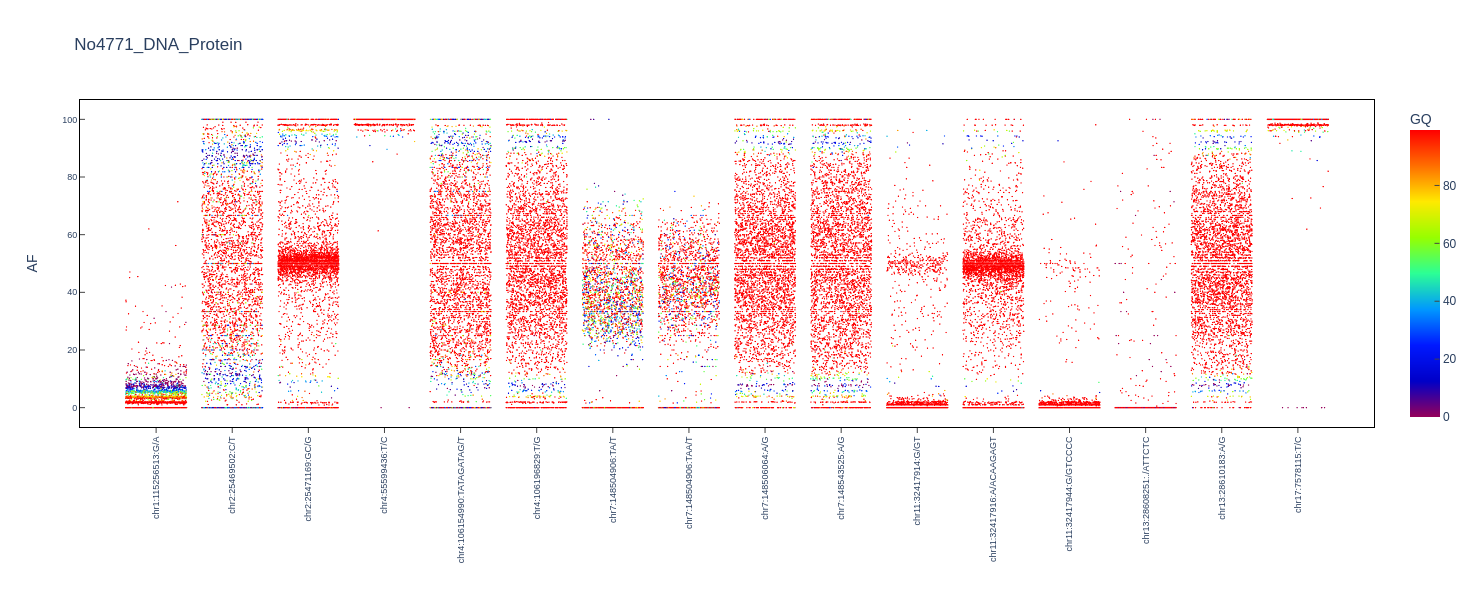

In [22]:
sample.dna.stripplot(attribute='AF', colorby='GQ')

In [27]:
sample.dna.heatmap(attribute='AF')

FigureWidget({
    'data': [{'colorscale': [[0.0, '#1f77b4'], [1.0, '#1f77b4']],
              'customdata': a…

In [28]:
sample.dna.selected_ids

array([], dtype=float64)

In [24]:
sample.dna.selected_ids

array([], dtype=float64)

In [38]:
list(sample.dna.selected_ids)

[]

In [19]:
sample.dna.metadata

{'sample_name': array([['No4771_DNA_Protein']], dtype=object),
 'ado_rate': 0.145,
 'af_cutoff': 20,
 'avg_mapping_error_rate': 0.007312185,
 'avg_panel_uniformity': 0.968503937007874,
 'chemistry_version': 'V2',
 'dp_cutoff': 10,
 'genome_version': 'hg19',
 'gq_cutoff': 30,
 'high_quality_variants': 0,
 'missing_cells_cutoff': 50,
 'missing_variants_cutoff': 50,
 'mutated_cells_cutoff': 1,
 'n_amplicons': 127,
 'n_bases_r1': 16916130300,
 'n_bases_r1_q30': 15359739454,
 'n_bases_r2': 16916130300,
 'n_bases_r2_q30': 14880794163,
 'n_cell_barcode_bases': 5630258266,
 'n_cell_barcode_bases_q30': 5450350282,
 'n_cells': 3921,
 'n_passing_cells': 3921,
 'n_passing_variants': 36,
 'n_passing_variants_per_cell': 15,
 'n_read_pairs': 112774202,
 'n_read_pairs_mapped_to_cells': 80786228,
 'n_read_pairs_trimmed': 112177675,
 'n_read_pairs_valid_cell_barcodes': 108159435,
 'n_reads_mapped': 213701458,
 'n_reads_mapped_insert': 212837014,
 'n_variants_per_cell': 76,
 'panel_name': 'AML',
 'pipeli

In [20]:
sample.dna = sample.dna.drop(sample.dna.selected_ids)

ValueError: Not all the given values are present in the assay.

#### Clustering

    DNA has a custom clustering method called `find_clones`
    
    It projects the data on a UMAP and then performs
    dbscan to identify unique clusters, which are then
    merged in case they were formed due to missing
    information

In [ ]:
sample.dna.find_clones()

In [ ]:
sample.dna.row_attrs

In [ ]:
sample.dna.scatterplot(attribute='umap', colorby='label')

In [ ]:
# AF_MISSING is the same as the AF layer except that it stores the missing values as -50 instead of 0

sample.dna.heatmap('AF_MISSING')

#### Conclusion

    1. Basic filtering of barcodes ids demonstrated
    2. Basic DNA filtering functionality showcased
    
[Go to the top](#DNA-Analysis)

### CNV Analysis

Preliminary heatmap of CNV shows that there could be two clusters

<b>Topics covered</b>
1. Dimension reduction options and their effects

#### Observation

In [ ]:
sample.cnv.normalize_reads()
sample.cnv.heatmap(attribute='normalized_counts')

#### PCA options

    Here the UMAP options are kept constant
    The only parameter in PCA is the number of components

    Here we see how to determine this value, and the effect
    when we deviate from this value

In [ ]:
sample.cnv.run_pca(attribute='normalized_counts', components=6, show_plot=True)
sample.cnv.run_umap(attribute='pca', min_dist=0, n_neighbors=100)

In [ ]:
# Too many PCA components

sample.cnv.run_pca(PCA_components=3, layer='normalized_counts')
sample.cnv.run_umap(attribute='pca', min_dist=0, n_neighbors=100)

In [ ]:
# Too few PCA components

sample.cnv.run_pca(PCA_components=3, layer='normalized_counts')
sample.cnv.run_umap(attribute='pca', min_dist=0, n_neighbors=100)

#### Visualization

    The result of the dimension reduction analysis is
    visualized using a scatterplot of the umap

In [ ]:
sample.cnv.cluster(attribute='umap', method='dbscan', eps=0.55)

In [ ]:
sample.cnv.scatterplot(attribute='umap', colorby='label')

#### CNV Conclusion

    Given all other variables are kept constant

    1. Too many PCA components may result in merging of clusters
    2. Too few PCA component may result in splitting of clusters
    3. The appropriate number of components can be determined using the elbow plot
    
[Go to the top](#CNV-Analysis)

### Protein Analysis

<b>Topics covered</b>
1. Basic workflow
2. Custom clustering eg. selection on biaxial plot
3. Custom methods by adding layers

#### Basic workflow

In [ ]:
# Downsampling and clustering similar to CNV
import igraph
sample.protein.normalize_reads('CLR')
sample.protein.run_pca(attribute='normalized_counts', components=5)
sample.protein.run_umap(attribute='pca')

sample.protein.cluster(attribute='pca', method='graph-community', k=100)

In [ ]:
sample.protein.heatmap(attribute='normalized_counts')

In [ ]:
sample.protein.scatterplot(attribute='umap', colorby='label')

In [ ]:
# Re cluster based on the observations from the UMAP

sample.protein.cluster(attribute='umap', method='dbscan')

In [ ]:
# Prefered way to look at protein expression profiles
# In case of an error, make sure that ids have been selected on the heatmap and shown in sample.protein.selected_ids

sample.protein.ridgeplot(attribute='normalized_counts',
                         splitby='label',
                         features=sample.protein.selected_ids)

In [ ]:
# UMAP with the expression for each of the selected protein overlayed
# In case of error, make sure that ids have been selected on the heatmap and shown in sample.protein.selected_ids

sample.protein.scatterplot(attribute='umap',
                           colorby='normalized_counts',
                           features=['CD34', 'CD44', 'HLA-DR'])

#### Custom clustering

    When `colorby` is not provided for any scatterplot
    the lasso tool can be used to cluster the cells
    based on the selection made

In [ ]:
# Selction on biaxial scatterplot
# The same can be done for the UMAP when labels=False is passed

sample.protein.feature_scatter(layer='normalized_counts',
                               ids=['CD90', 'CD3'])

In [ ]:
# Set the labels based on the selection in the above plot

sample.protein.set_selected_labels()

#### Custom methods by adding layers

    If someone is interested in trying their methods,
    they can simply modify the appropriate layers, attributes
    and metadata to plugin their step in this workflow

In [ ]:
# Custom normalization by changing the `normalized_counts` layer

import numpy as np

log_reads = np.log10(10 + sample.protein.layers['read_counts'])
norm = np.divide(log_reads, log_reads.mean(axis=1).reshape(-1, 1))


sample.protein.add_layer('normalized_counts', norm)

    Other examples include:
    
    custom labels -> 'label' row_attr
    custom palette -> 'palette' metadata   

#### Protein Conclusion

    1. Protein analysis workflow similar to CNV
    2. Different clustering methods can result in
       different types of clusters being identified
    3. It is possible to have custom clustering for
       any scatterplot by using the lasso tool
    4. Custom analysis is possible by modifying appropriate
       layers, attributes and metadata
       
[Go to the top](#Protein-Analysis)

### Statistical Significance

    The significane of differential expression
    based on a t-test can be looked at using
    the `feature_signature` method

In [ ]:
med, std, pval, tstat = sample.protein.feature_signature(layer='normalized_counts')

In [ ]:
pval

In [ ]:
pval = pval + 10 ** -50 + pval
pvals = -np.log10(pval) * (tstat > 0)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(pvals.T, vmax=50, vmin=2)

Conclusion

Statistical significance of the differential expression<br>
can be ascertained. Median values can be explored for DNA<br>
to determine the difference between clusters.
       
[Go to the top](#Statistical-Significance)

### Combined Visualizations

    Visualization for multiple assays at once

#### Clone vs Analyte

##### CNV

In [ ]:
sample.clone_vs_analyte('cnv')

##### Protein

In [ ]:
sample.clone_vs_analyte('protein')

In [ ]:
# Filtering protein and cnv to improve the visualization

sample.protein = sample.protein[:, ['CD3', 'CD90']]
sample.cnv = sample.cnv[:, 58:85]
sample.clone_vs_analyte('protein')

In [ ]:
# Certain clones can also be dropped, but they must be dropped from all assays
# Hence the sample object is sliced in this case
# In this case it is better to store the new sample in a separate variable

# This returns the dna barcodes with the given labels
select_bars = sample.dna.barcodes(['2', '3', '4'])

sample_subset = sample[select_bars]
sample_subset.clone_vs_analyte('protein')

In [ ]:
# The ids can also be reset to the entire set

sample.reset('cnv')
sample.reset('protein')
sample.clone_vs_analyte('protein')

#### Multi assay heatmap

In [ ]:
sample.heatmap(clusterby='dna', sortby='protein', drop='cnv', flatten=False)

# Try the following
# sample.heatmap(clusterby='dna', sortby='protein', drop='cnv', flatten=True)
# sample.heatmap(clusterby='protein', sortby='dna', drop='cnv', flatten=False)
# sample.heatmap(clusterby='dna', sortby='protein', flatten=False)

[Go to the top](#Combined-Visualizations)

### Saving

    The analysis can be saved to an h5 file.
    This final trimmed file will be much smaller than the original h5 file.
    It can be opened in Insights, or back again in Mosaic

In [ ]:
mio.save(sample, './sample.analyzed.h5')

    Data from h5 files can be efficiently manipulated,
    visualized, and inferred using Mosaic.